# Парсинг фотографий с сайта cian.ru с помощью Selenium

Здравствуйте дорогие хабровчане, в этом небольшом примере я хочу показать как можно распарсить страницу, данные на которую подгружаются с помощью javascript виджетов. Более того, даже если страницу в этом примере просто сохранить, то всё равно не получится спарсить из неё все нужные фотографии из-за этих виджетов. В данном случае я использую для примера сайт [cian.ru](https://www.cian.ru/), у которого есть свой [api](https://public-api.cian.ru/), который я использовать не буду, вместо этого я буду использовать Selenium. Я не работаю в cian.ru, просто использую этот сайт для примера. Код в парсере простой и расчитан на начинающих.

Небольшое вступление - когда на досуге я рассматривал примеры ремонтов в cian.ru, я подумал, что не плохо было бы сохранить понравившиеся мне фотографии, но вручную сохранять их было бы долго, к тому же это не наш метод, так я и решил написать этот парсер.

Парсер написан на языке python3 из дистрибутива [Anaconda](https://anaconda.org/conda-forge/python-chromedriver-binary), [Selenium](https://anaconda.org/conda-forge/selenium) и [chromedriver binary](https://anaconda.org/conda-forge/python-chromedriver-binary) я установил отдельно именно из этих ссылок. (Ну и конечно же в системе должен быть установлен барузер [Google Chrome](https://www.google.com/intl/ru/chrome/))

Ниже представлен полный код парсера, далее я разберу основные моменты отдельно.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import chromedriver_binary 
import urllib
import time

print('start...')

site = "https://www.cian.ru/sale/flat/222059642/"

chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(options=chrome_options)
#driver = webdriver.Chrome()
driver.get(site)

i = 0

while True:   
    try:
        url = driver.find_element_by_xpath("//div[contains(@class, 'fotorama__active')]/img").get_attribute('src')
    except NoSuchElementException:
        break        

    i += 1
    print(i, url)
            
    driver.find_element_by_xpath("//div[@class='fotorama__arr fotorama__arr--next']").click()
    
    name = url.split('/')[-1]
    urllib.request.urlretrieve(url, name)
    
    time.sleep(2)

print('done.')

Первым делом я загрузил страницу https://www.cian.ru/sale/flat/222059642/ с понравившимися мне фотографиями. Для этого я создал объект `driver` браузера и передал ему ссылку через метод `get`. Обратите внимание, что я использую [Headless Chrome](https://habr.com/ru/company/oleg-bunin/blog/421137/), т.е. передаю в `webdriver.Chrome()` параметры опций браузера с аргументом `--headless`, благодаря этому браузер не будет реально отрисовывать содержимое страницы, если вы захотите посмотреть на отрисовку, то не передавайте аргументы `chrome_options` и тогода вы сможете увидеть, что происходит на самом деле.

In [ ]:
site = "https://www.cian.ru/sale/flat/222059642/"

chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(options=chrome_options)
#driver = webdriver.Chrome()
driver.get(site)

Далее в цикле я начал парсить фотографии, логика парсера работет также, как если бы я сам скачивал их вручную, т.е. сохраняю текущую фотографию и нажимаю на стрелку "next".

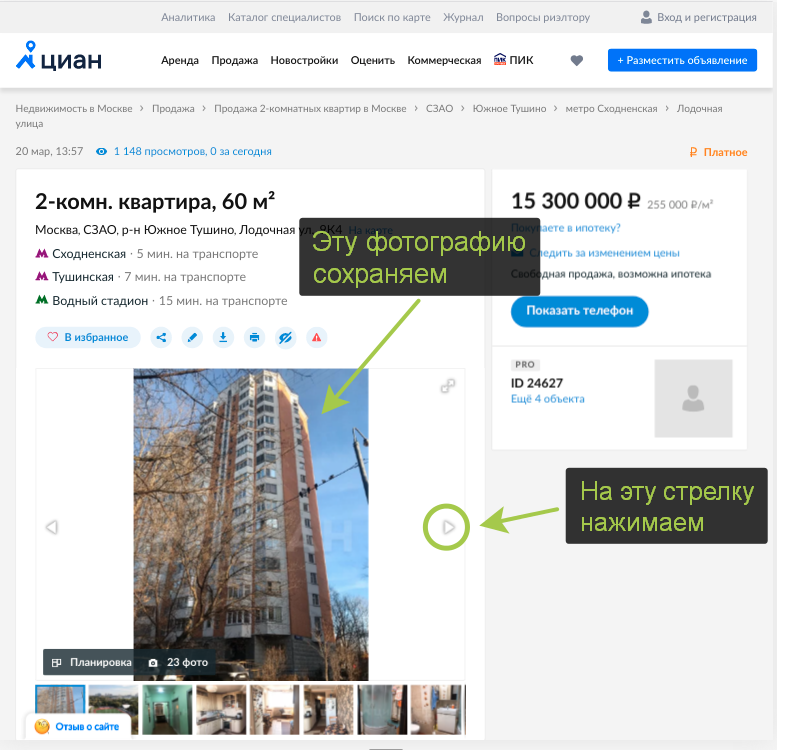

Код ниже сохраняет в переменную `url` ссылку на фотографию, блок `try/except` отслеживает ошибку `NoSuchElementException`, эта ошибка возникает, когда все фотографии скачаны и Selenium больше не находит ссылку.

In [ ]:
    try:
        url = driver.find_element_by_xpath("//div[contains(@class, 'fotorama__active')]/img").get_attribute('src')
    except NoSuchElementException:
        break       

Слудующий блок кода буквально кликает по стрелке для перехода к следующей фотографии.

In [ ]:
    driver.find_element_by_xpath("//div[@class='fotorama__arr fotorama__arr--next']").click()

Далее сохраняем фотографию по ссылке на диск через библиотеку `urllib`.

In [ ]:
    name = url.split('/')[-1]
    urllib.request.urlretrieve(url, name)

И в конце простой но важный код, задержка позволяет полностью подгрузиться странтице после клика по стрелке. (здесь можно сделать код почище организовав задержку средствами Selenium)

In [ ]:
    time.sleep(2)

Вот такой пример парсера фоторграфий на Selenium, не утверждаю, что это лучший подход, если кто-то знает как сделать лучше напишите свои идеи в комментах.